# Тестовое задание для кандидата в команду валидации Альфа-Банка

**Привет!** На связи команда валидации Альфа-Банка. Мы отвечаем за то, чтобы модели, которые используются для принятия решений, были надежными, справедливыми и понятными. Твое задание — провести моделирование и валидацию кредитной модели. Удачи, и помни: мы верим в твои силы! 💪  

---

## Цель  
Проверить навыки анализа данных, валидации ML-моделей и умение формулировать выводы для бизнеса.  

---

## Датасет  
**Название:** [Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit/data)  
https://drive.google.com/file/d/1LIrFep0YD5g9nZvDwtfG0_T_0euVY_11/view?usp=drive_link

**Описание:**  
Прогнозирование дефолта заемщика на основе финансовых и демографических признаков.
https://docs.google.com/spreadsheets/d/1dMH5FFvEQY1AB8jvyspPWn24P-RfVvw0/edit?usp=drive_link&ouid=111862829926071319775&rtpof=true&sd=true

**Признаки:**  
- `RevolvingUtilizationOfUnsecuredLines` (использование кредитных линий),  
- `age`, `MonthlyIncome`, `NumberOfDependents` и др.  

**Целевая переменная:** `SeriousDlqin2yrs` (дефолт: 0/1).  

---

## Задача  
Проведите валидацию модели кредитного скоринга (логистическая регрессия или градиентный бустинг) и подготовьте отчет.  

---

## Шаги  

### 1. Анализ и предобработка данных  
- Обработайте пропуски (например, в `MonthlyIncome`).  
- Исследуйте выбросы (например, возраст < 18 лет).  
- Визуализируйте распределения ключевых признаков.  
- Предложите методы борьбы с дисбалансом классов.  

### 2. Построение и оценка модели  
- Разделите данные на train/validation/test.  
- Обучите модель (логистическая регрессия или CatBoost/XGBoost).  
- Рассчитайте метрики: **AUC-ROC, Precision, Recall, F1-Score**.  
- Проверьте устойчивость модели через кросс-валидацию (5 folds).  

### 3. Интерпретация и этика  
- Выделите **топ-5 признаков**, влияющих на прогноз (SHAP/LIME).  
- Проверьте логичность влияния признаков (например, высокая долговая нагрузка → выше риск дефолта).  
- Оцените fairness модели: сравните метрики (FPR, TPR) для групп (например, **молодые** vs **старше 40 лет**).  

### 4. Отчет  
Подготовьте общие выводы по проведенной валидации, включив:  
- Выводы о качестве модели и её ограничениях.  
- Рекомендации по улучшению (например, сбор дополнительных данных).  
- Пример: *«Как изменится прогноз, если у заемщика появится иждивенец?»*  

---

## Технические требования  
- Язык: **Python** (Jupyter Notebook).  
- Код должен быть читаемым и содержать комментарии.  

---

## Критерии оценки  
1. Глубина анализа данных и обработки выбросов.  
2. Корректность выбранных метрик и их интерпретация.  
3. Качество визуализаций (распределения, важность признаков).  
4. Практичность рекомендаций в отчете.    

---

**Срок выполнения:** 7 дней.  
**Формат сдачи:**  
- Ноутбук в Collab/GitHub-репозиторий.    

---

Это задание покажет, как вы подходите к анализу реальных данных и делаете ML-модели прозрачными для бизнеса. Ждем твою работу! 🚀  

## Подготовка и анализ данных (EDA)

In [1]:
import pandas as pd

df = pd.read_csv("dataset.csv", index_col=[0])
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Пердварительно видим, что пустых строк в данных нету.
Чистые?
Вряд ли.
На 150k записей это очень маловероятно. Ищем "Nan" "None", "NA", "N/A" и т.д.

Так же видим огромный дисбаланс в сторону нулевого таргета.

Есть Нулевой возраст, а еще такой возраст, как 109.

`NumberOfOpenCreditLinesAndLoans` имеет максимальное значение 56 и среднее 8, надо присмотреться.

`NumberOfTimes90DaysLate` странная фича с низким средним и практичечски вся выборка нулевая, судя по процентилям. Мб дроп?

`NumberRealEstateLoansOrLines` тоже выбросы имеются, в целом выглядит норм.

`NumberOfTime60-89DaysPastDueNotWorse` - тоже странная фича, тоже мб дроп.


ПОДРОБНЫЙ ОТЧЕТ БУДЕТ В КОНЦЕ EDA


In [3]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

Видим, что все типы численные. Поэтому при переносе данных, строки автоматически заменились на `NaN`.

In [4]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Гипотеза верная, есть пропуски, причем заначительные. Так как пропуски составляют ~20% датасета, дропать их не вариант. Будем делать impute. Стратегию вставки выберем после анализа распределения.

Но пойдем по порядку с и разберемся с каждой фичей.

### Картинки

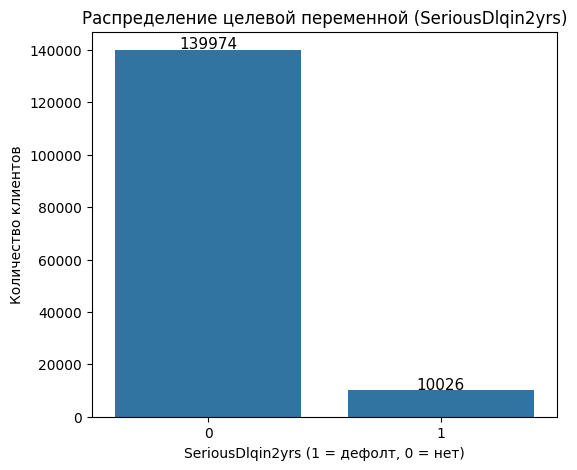

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(6,5))
sns.countplot(x='SeriousDlqin2yrs', data=df)

plt.title('Распределение целевой переменной (SeriousDlqin2yrs)')
plt.xlabel('SeriousDlqin2yrs (1 = дефолт, 0 = нет)')
plt.ylabel('Количество клиентов')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,
             p.get_height() + 500,
             f'{int(p.get_height())}',
             ha='center', fontsize=11)
plt.show()

In [6]:
print(df['SeriousDlqin2yrs'].mean() * 100, '% клиентов имеют дефолт')

6.683999999999999 % клиентов имеют дефолт


Дисбаланс подтвердился. Значит accuracy нам не поможет никак, ориентируемся на F1, P, R, и PR-AUC (так как огромный дисбаланс) оверсамплить не будем, наверное так как неясно какие фичи больше всего влияют на пресказание. Лучшие сделаем class weight в модели. Думаю, начнем с лог рега, как раз поиграемся с погором.

Text(0.5, 0, 'отношение суммы долга к существующему лимиту')

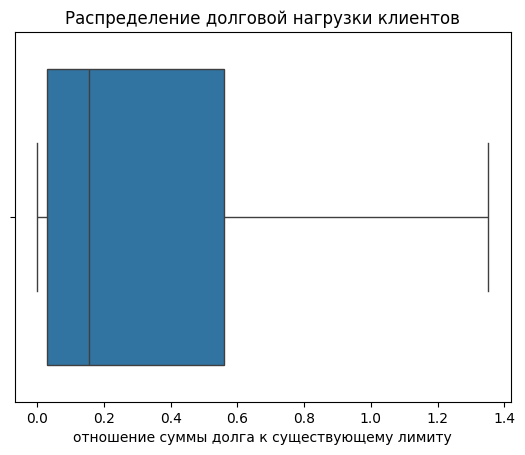

In [7]:
load = df['RevolvingUtilizationOfUnsecuredLines']

sns.boxplot(x= load, showfliers=False)
plt.title('Распределение долговой нагрузки клиентов')
plt.xlabel('отношение суммы долга к существующему лимиту')

Если убирать выбросы, то увидим, что у большинства клиентов низкая догловая нагрузка

Text(0.5, 0, 'Возраст')

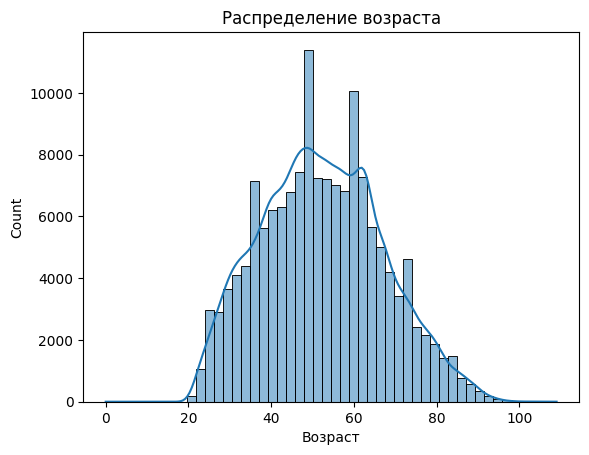

In [8]:
age = df['age']
sns.histplot(age, bins=50, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')

In [9]:
illigal = df[df['age'] < 18]
old = df[df['age'] > 95]  # После 95 кредит только мошенники на тебя берут
print("Сколько выбросов возраста:", illigal.shape[0] + old.shape[0])

Сколько выбросов возраста: 64


Тоже нормик, выбросы удалим в предобработке

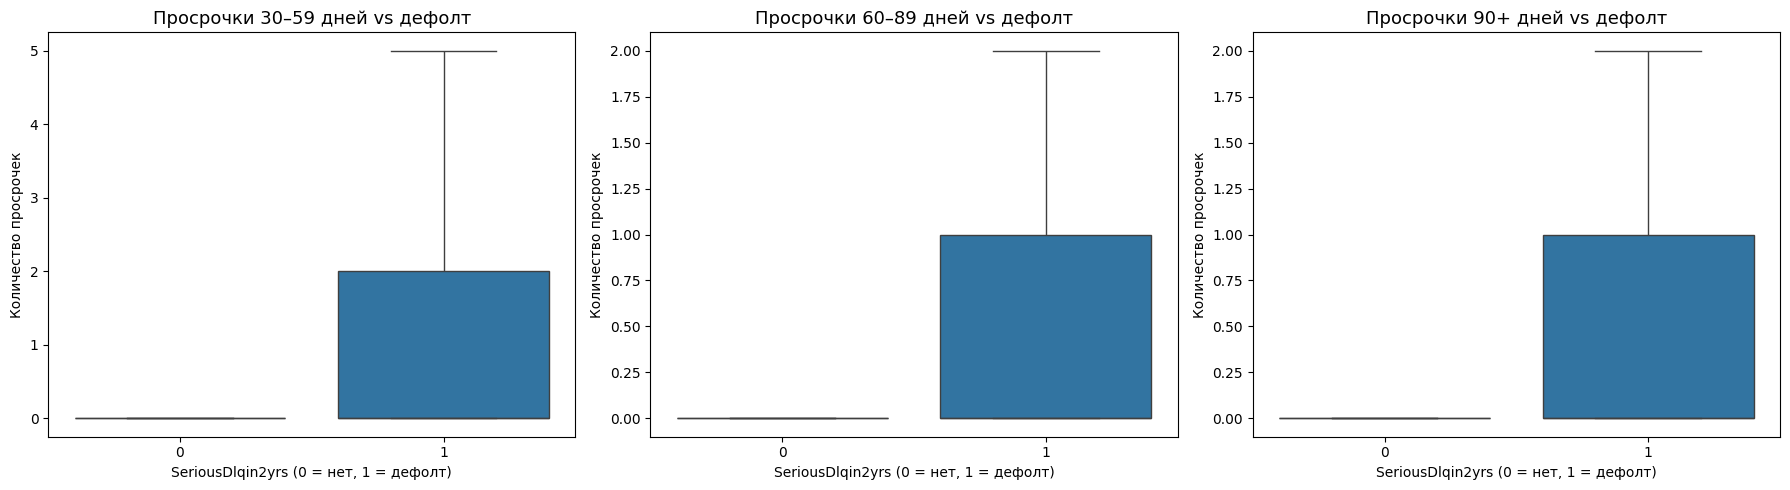

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate'
]
titles = [
    'Просрочки 30–59 дней vs дефолт',
    'Просрочки 60–89 дней vs дефолт',
    'Просрочки 90+ дней vs дефолт'
]

for ax, feature, title in zip(axes, features, titles):
    sns.boxplot(
        x='SeriousDlqin2yrs',
        y=feature,
        data=df,
        ax=ax,
        showfliers=False,
    )
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('SeriousDlqin2yrs (0 = нет, 1 = дефолт)')
    ax.set_ylabel('Количество просрочек')

plt.tight_layout()
plt.show()

Фичи дропнуть не можем, потому что после удаления высоких выбросов, видим насколько просрочки значими для дефолта(логично). Значит обрежем выбросы, и заскейлим.

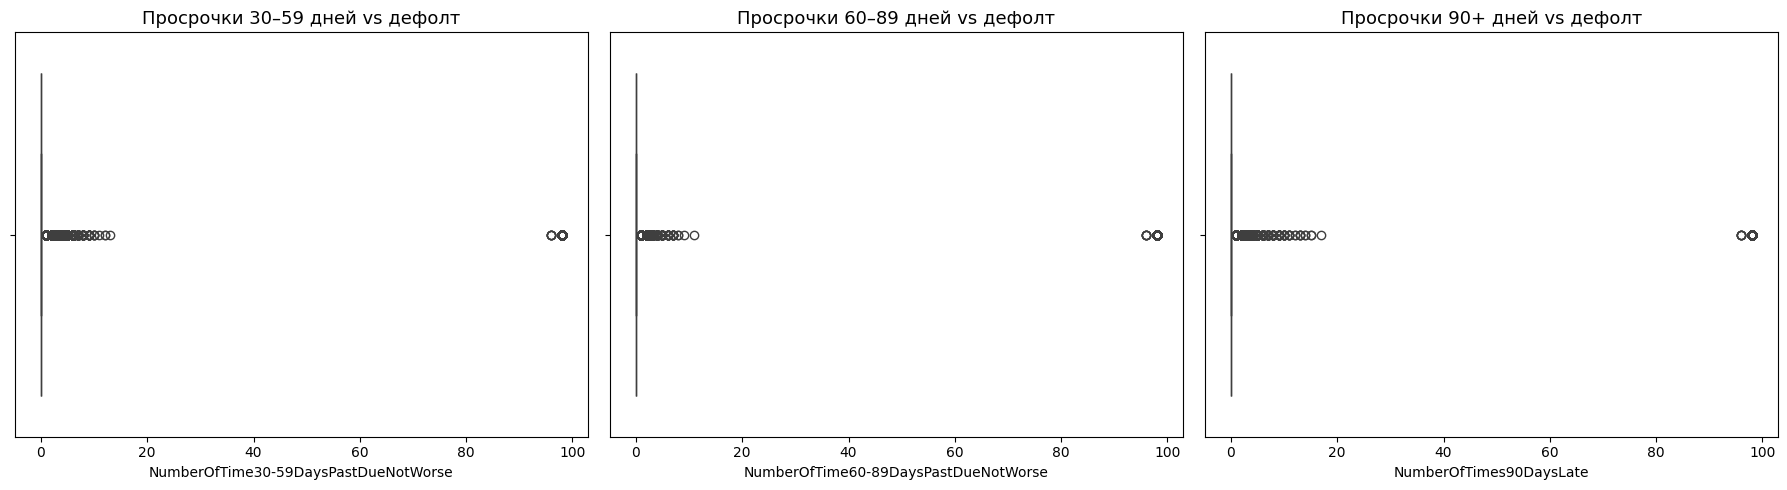

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate'
]
titles = [
    'Просрочки 30–59 дней vs дефолт',
    'Просрочки 60–89 дней vs дефолт',
    'Просрочки 90+ дней vs дефолт'
]

for ax, feature, title in zip(axes, features, titles):
    sns.boxplot(
        x=feature,
        data = df,
        ax = ax
    )
    ax.set_title(title, fontsize=13)

plt.tight_layout()
plt.show()

смело режем по 50

/Users/maxmartyshov/Desktop/IU/test_a/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'debt ratio (логарифм)')

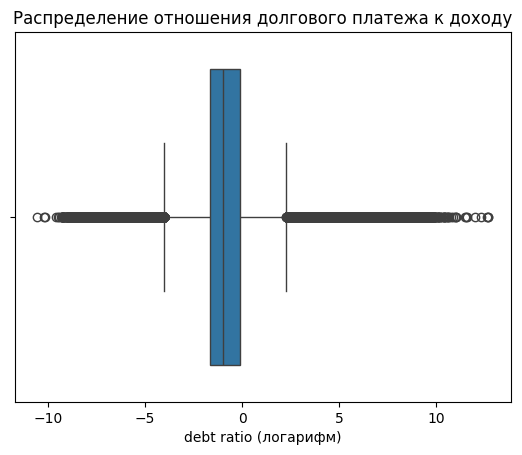

In [12]:
ratio = df['DebtRatio']
sns.boxplot(x=np.log(ratio))
plt.title('Распределение отношения долгового платежа к доходу')
plt.xlabel('debt ratio (логарифм)')

DebtRatio - это отношение платежа по кредитам к месечному доходу. Сморим под логарифмом, чтобы оценить, соотношение людей у которых долг меньше дохода и больше. Все кто слева имеют соотношение меньше (0 < debt ratio < 1, поэтому логарифм отрицательный), кто справа - имеют долг больше, дохода. Картина печальная так как неправильных должников немного больше

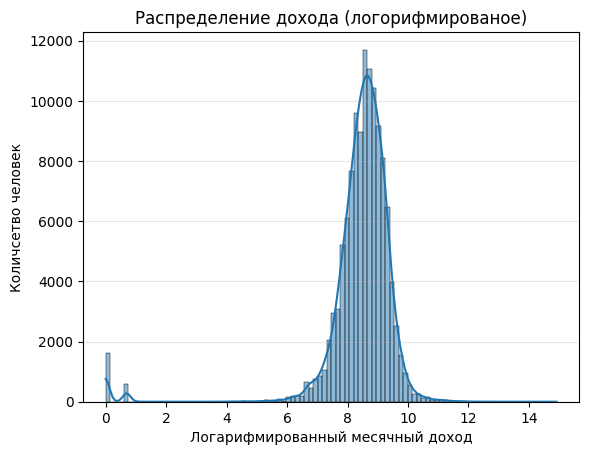

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


income_data = df['MonthlyIncome'].dropna()

# plt.figure(figsize=(10,6))

sns.histplot(np.log1p(income_data), bins=100, kde=True)

plt.title('Распределение дохода (логорифмированое)')
plt.xlabel('Логарифмированный месячный доход')
plt.ylabel('Количсетво человек')
plt.grid(axis='y', alpha=0.3)

plt.show()

Text(0.5, 0, 'Количество кредитов')

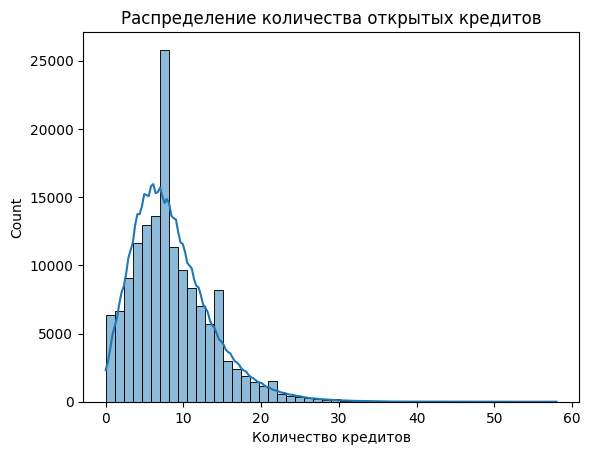

In [14]:
n_lines = df['NumberOfOpenCreditLinesAndLoans']
sns.histplot(n_lines, bins=50, kde=True)
plt.title('Распределение количества открытых кредитов')
plt.xlabel('Количество кредитов')

В целом, нормик

Text(0.5, 0, 'Количество кредитов')

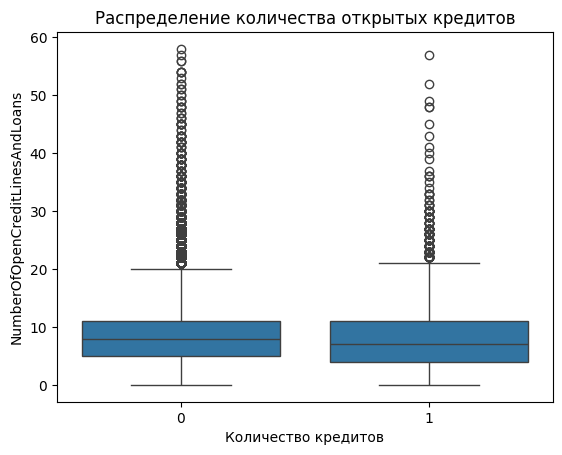

In [15]:
n_lines = df['NumberOfOpenCreditLinesAndLoans']
sns.boxplot(y=n_lines, x=df['SeriousDlqin2yrs'] )
plt.title('Распределение количества открытых кредитов')
plt.xlabel('Количество кредитов')

покажем действенность лог трасформа на выбросы

Text(0.5, 0, 'Количество кредитов')

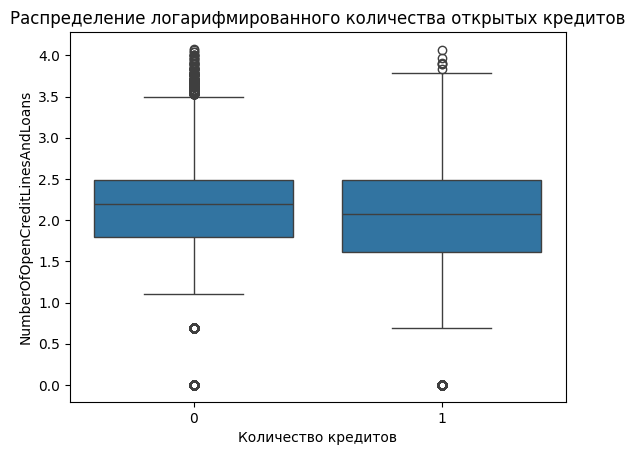

In [16]:
n_lines = df['NumberOfOpenCreditLinesAndLoans']
sns.boxplot(y=np.log1p(n_lines), x=df['SeriousDlqin2yrs'] )
plt.title('Распределение логарифмированного количества открытых кредитов')
plt.xlabel('Количество кредитов')

Да, мы немного теряем в интерпретабельности, но для линейной модели такая картина данных очень даже хороша

Text(0.5, 0, 'Количество иппотек')

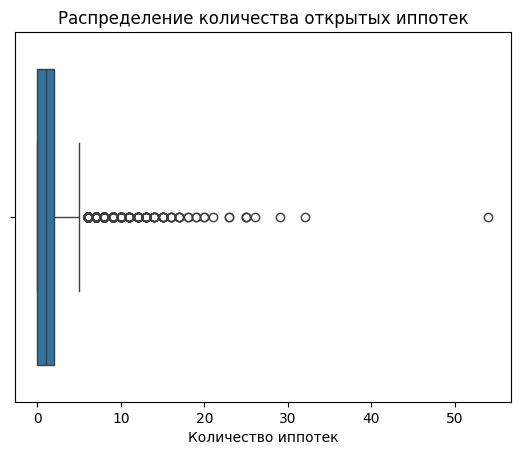

In [17]:
n_lines = df['NumberRealEstateLoansOrLines']
sns.boxplot(x=n_lines)
plt.title('Распределение количества открытых иппотек')
plt.xlabel('Количество иппотек')

Text(0.5, 0, 'Количество иждивенцев')

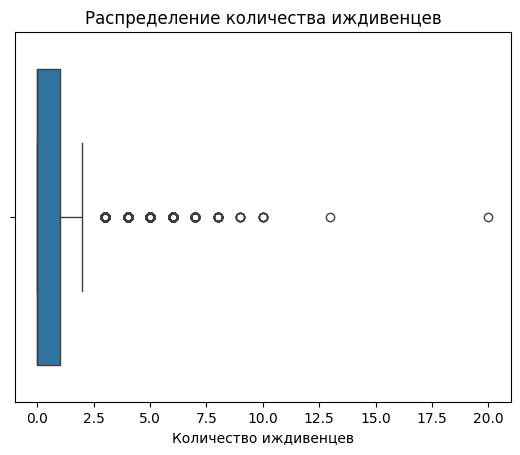

In [18]:
dep = df['NumberOfDependents']
sns.boxplot(x=dep)
plt.title('Распределение количества иждивенцев')
plt.xlabel('Количество иждивенцев')



In [19]:
df[df['NumberOfDependents'] > 10]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6300,0,0.226616,40,1,0.576539,6316.0,11,2,1,0,20.0
128035,0,1.000000,53,1,0.230054,3333.0,3,1,1,0,13.0


Ну, не может такого быть, чтобы на человеке висело 20 иждевенцев. Оставим не более 10 (удалим 2 точки)

На этом закончим анализ и подведем итоги.

In [20]:
df['age'] = df['age'].clip(lower=18, upper=95)
df['NumberOfDependents'] = df['NumberOfDependents'].clip(upper=10)

## Выводы из EDA

1) **SeriousDlqin2yrs**
  - Целевая переменная, бинарная классификация (0/1), где 0 - все хорошо, 1 - дефолт.
  - Огромный дисбаланс: ~7% положительного класса
  - Выводы:
    - Ориентируемся на метрики Presicison, Recall, F1. Также посмотрим на PR-AUC.
    - В логистической регрессии использоуем `class_weight='balanced'`
2) **RevolvingUtilizationOfUnsecuredLines**
  - Показывает кредитную нагрузку клиента, измеряеся в процентах
  - Убрав выбросы, получим хорошее распреление, смещенное немного влево.
  - **Предобработка**:
      - Лог-трансформ (log1p)
      - стандартный скейлинг
3) **age**
  - Возраст клиента
  - Разпределение около-нормального, со средним ~50
  - Подозрение на искусственный признак (выборка 0-100, среднее ровно посередине)
  - **Предобработка**:
    - 18 <= age <= 95
    - стандартный скейлинг
4) **NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate**
  - Просрочки 3 типов:
    - 1-2 месяца
    - 2-3 месяца
    - 3 месяца
  - Все три сильно коррелируют с целевым признаком.
  - **Предобработка**:
    - Лог-трансформ (log1p)
    - Стандартный скейлинг
5) **DebtRatio**
  - Отношение месячного кредитного платежа к месячному доходу, примечательно, что имеем платежи как ниже так и выше дохода.
  - **Предобработка**:
    - Лог трансформ (эффективно разделит значения, и смягчит выбросы)
    - стандартный скейлинг
6) **MonthlyIncome**
  - Доход клиента, ожидаемы незнаичтельные выбросы в сторону сверх высокого дохода
  - Имеет много пропусков (30k)
  - **Предобработка**:
    - Impute медианой
    - Лог трансформ (log1p)
    - стандартный скейлинг
7) **NumberOfOpenCreditLinesAndLoans**
  - Количество открытых кредитов
  - Есть выбросы, но они не сигнализируют дефолт
  - **Предобработка**:
    - Лог трансформ (log1p)
    - стандартный скейлинг
8) **NumberRealEstateLoansOrLines**
  - Текущее количество иппотек
  - Аналогично предыдущему признаку
  - **Предобработка**:
    - Лог трансформ (log1p)
    - стандартный скейлинг
9) **NumberOfDependents**
- Количество иждевенцев у клиента
- Есть нереалистичные выбросы по типу 20 иждевенцев
- Есть незначительные пропуски
- **Предобработка**:
  - Impute медианой
  - Clip: upper = 11
  - стандартный скейлинг

  



## Обработка данных

Заменим NaN на медиану, так как высокие значения айтлаеров сдвигают среднее вправо.

Чтобы смягчить выбросы, используем лог трансформ `log1p` (log1p(x) = log(1+x)) на большинство признаков, НО для DebtRatio используем обычный логарифм, чтобы отношения меньше 1 стали отрицательными. Чтобы не брать лог от 0 вручную заменим все нулевые значения на 1.



In [21]:
target = 'SeriousDlqin2yrs'

features_for_log1p = [
    'RevolvingUtilizationOfUnsecuredLines',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate'
]

features_for_log = [
    'DebtRatio'
]

features_to_impute = [
    'MonthlyIncome',
    'NumberOfDependents'
]

impute_strategy = 'median'

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy=impute_strategy)
scaler = StandardScaler()

In [23]:
def preprocess_pipeline(X, y, train=True):
  # impute data
  columns = X.columns

  if train:
    X = imputer.fit_transform(X)
  else:
    X = imputer.transform(X)

  # log transform
  X = pd.DataFrame(X, columns=columns)
  X_log1p = X[features_for_log1p].copy()
  X_log = X[features_for_log].copy()
  X_log1p = np.log1p(X_log1p)
  X_log = X_log.replace({0: 1})
  X_log = np.log(X_log)
  X = pd.concat([X.drop(features_for_log1p + features_for_log, axis=1), X_log1p, X_log], axis=1)

  # scale
  if train:
    X = scaler.fit_transform(X)
  else:
    X = scaler.transform(X)

  X = pd.DataFrame(X, columns=columns)  # Названия колонок могут потом пригодиться

  return X, y

In [24]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
X_test_og = X_test.copy()  # Чтобы не депроцесить данные после, скопируем эти и используем на анализе модели

In [28]:
X_train, y_train = preprocess_pipeline(X_train, y_train)
X_test, y_test = preprocess_pipeline(X_test, y_test, train=False)

In [29]:
X_test_og = imputer.transform(X_test_og)  #  уберем пропуски
X_test_og = pd.DataFrame(X_test_og, columns=X.columns)

Досэмплируем данные с помощью SMOTE

In [30]:
# from imblearn.over_sampling import SMOTE

# print("Before SMOTE:", np.bincount(y_train))

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# print("After SMOTE: ", np.bincount(y_train))


Не был эффективен - убрали

## Моделирование

Мы будем работать с логистической регрессией, потому что у нее минимальное количество гиперпараметров и нам не нужна модель сложнее под этот датасет.




In [31]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    solver="liblinear",
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
}

grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="average_precision",  #PR-AUC
    refit=True,
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV PR-AUC (AP):", grid.best_score_)
best_model = grid.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'C': 0.001, 'penalty': 'l2'}
Best CV PR-AUC (AP): 0.3538887821892542


Посмотрим на тестовые метрики

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    average_precision_score, precision_recall_curve,
    classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)

def evaluate(
    y_true,
    y_proba,
    model_name="model",
    plot=True,
    digits=4,
):
    """
    Evaluate binary classifier with PR-AUC (AP), ROC-AUC,
    default 0.5 metrics, best-F1 threshold metrics,
    and optional PR/ROC plots in one row.

    Returns a dict with metrics and chosen threshold.
    """
    y_true = np.asarray(y_true).astype(int)
    y_proba = np.asarray(y_proba).astype(float)

    prevalence = y_true.mean()

    # scalar metrics
    ap_value  = average_precision_score(y_true, y_proba)
    auc_value = roc_auc_score(y_true, y_proba)

    print(f"\nEvaluating model: {model_name}")
    print(f"Test PR-AUC (AP): {ap_value:.{digits}f}")
    print(f"Test ROC-AUC:     {auc_value:.{digits}f}")

    # curves
    prec, rec, thr_pr = precision_recall_curve(y_true, y_proba)
    fpr,  tpr, thr_roc = roc_curve(y_true, y_proba)

    # plotting side-by-side
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))

        # PR curve with baseline = prevalence
        axes[0].plot(rec, prec, lw=2, label=f"PR (AP = {ap_value:.3f})")
        axes[0].plot([0, 1], [prevalence, prevalence], ls="--", label=f"Baseline = {prevalence:.3f}")
        axes[0].set(xlim=(0,1), ylim=(0,1.05), xlabel="Recall", ylabel="Precision", title="Precision–Recall Curve")
        axes[0].legend(loc="lower left")
        axes[0].grid(alpha=0.3)

        # ROC curve with random baseline
        axes[1].plot(fpr, tpr, lw=2, label=f"ROC (AUC = {auc_value:.3f})")
        axes[1].plot([0,1],[0,1], ls="--", label="Random baseline")
        axes[1].set(xlim=(0,1), ylim=(0,1.05), xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve")
        axes[1].legend(loc="lower right")
        axes[1].grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

    # metrics @ default 0.5
    def _print_block(y_hat, name, thr):
        print(f"\n{name} (threshold = {thr:.4f})")
        print(f"Precision: {precision_score(y_true, y_hat):.{digits}f}")
        print(f"Recall:    {recall_score(y_true, y_hat):.{digits}f}")
        print(f"F1:        {f1_score(y_true, y_hat):.{digits}f}")
        print(f"Accuracy:  {accuracy_score(y_true, y_hat):.{digits}f}")

    y_pred_05 = (y_proba >= 0.5).astype(int)
    _print_block(y_pred_05, "Metrics @0.5", 0.5)

    # best-F1 threshold
    f1_arr = 2 * prec[1:] * rec[1:] / (prec[1:] + rec[1:] + 1e-12)
    best_idx = int(np.nanargmax(f1_arr))
    best_thr = float(thr_pr[best_idx]) if thr_pr.size > 0 else 0.5

    y_pred_best = (y_proba >= best_thr).astype(int)
    _print_block(y_pred_best, "Metrics @best-F1", best_thr)

    print("\nClassification report @best-F1:")
    print(classification_report(y_true, y_pred_best, digits=digits))

    print("Confusion matrix @best-F1:")
    print(confusion_matrix(y_true, y_pred_best))

    # collect outputs
    results = {
        "model": model_name,
        "prevalence": prevalence,
        "ap": ap_value,
        "roc_auc": auc_value,
        "threshold_default": 0.5,
        "precision_0p5": precision_score(y_true, y_pred_05),
        "recall_0p5":    recall_score(y_true, y_pred_05),
        "f1_0p5":        f1_score(y_true, y_pred_05),
        "acc_0p5":       accuracy_score(y_true, y_pred_05),
        "best_f1":       f1_arr[best_idx] if f1_arr.size else np.nan,
        "best_threshold": best_thr,
        "precision_best": precision_score(y_true, y_pred_best),
        "recall_best":    recall_score(y_true, y_pred_best),
        "f1_best":        f1_score(y_true, y_pred_best),
        "acc_best":       accuracy_score(y_true, y_pred_best),
        "pr_curve": {"precision": prec, "recall": rec, "thresholds": thr_pr},
        "roc_curve": {"fpr": fpr, "tpr": tpr, "thresholds": thr_roc},
    }
    return results


Evaluating model: LogisticRegression
Test PR-AUC (AP): 0.3559
Test ROC-AUC:     0.8555


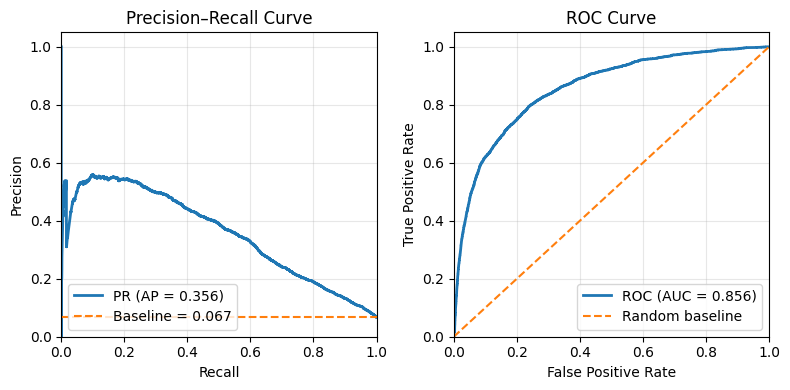


Metrics @0.5 (threshold = 0.5000)
Precision: 0.2295
Recall:    0.7231
F1:        0.3484
Accuracy:  0.8192

Metrics @best-F1 (threshold = 0.7278)
Precision: 0.3989
Recall:    0.4887
F1:        0.4393
Accuracy:  0.9166

Classification report @best-F1:
              precision    recall  f1-score   support

           0     0.9628    0.9473    0.9549     41992
           1     0.3989    0.4887    0.4393      3008

    accuracy                         0.9166     45000
   macro avg     0.6808    0.7180    0.6971     45000
weighted avg     0.9251    0.9166    0.9205     45000

Confusion matrix @best-F1:
[[39777  2215]
 [ 1538  1470]]


In [33]:
y_proba = best_model.predict_proba(X_test)[:,1]
lr_results = evaluate(y_test, y_proba, model_name='LogisticRegression')

Прогнали без лог трансформа - результаты ниже на 5%, поэтому трансформация оправдана

In [34]:
from xgboost import XGBClassifier

neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos if pos > 0 else 1.0

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr", 
    tree_method="hist", 
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight  
)

param_grid = {
    'learning_rate':    [0.05, 0.07, 0.1],
    'max_depth':        [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample':        [0.8],
    'colsample_bytree': [0.8],
    'n_estimators':     [300, 500, 700, 900],
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="average_precision",  # PR-AUC
    refit=True,
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV PR-AUC (AP):", grid.best_score_)
best_model = grid.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/Users/maxmartyshov/Desktop/IU/test_a/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.07, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8}
Best CV PR-AUC (AP): 0.39750440418430444



Evaluating model: XGBoost
Test PR-AUC (AP): 0.4020
Test ROC-AUC:     0.8668


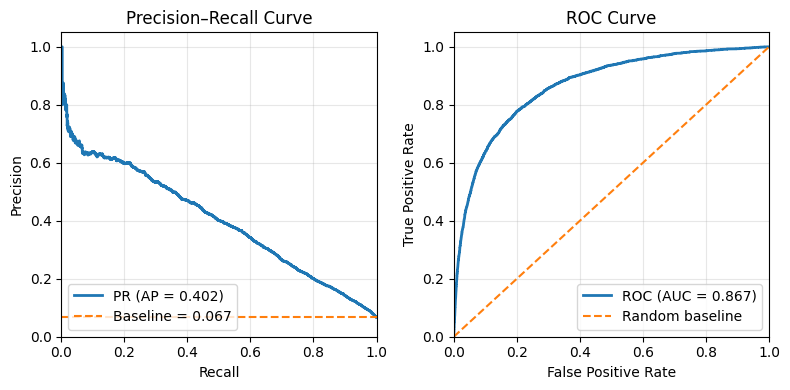


Metrics @0.5 (threshold = 0.5000)
Precision: 0.2157
Recall:    0.7793
F1:        0.3378
Accuracy:  0.7958

Metrics @best-F1 (threshold = 0.7567)
Precision: 0.3902
Recall:    0.5246
F1:        0.4475
Accuracy:  0.9134

Classification report @best-F1:
              precision    recall  f1-score   support

           0     0.9651    0.9413    0.9530     41992
           1     0.3902    0.5246    0.4475      3008

    accuracy                         0.9134     45000
   macro avg     0.6776    0.7329    0.7003     45000
weighted avg     0.9267    0.9134    0.9192     45000

Confusion matrix @best-F1:
[[39526  2466]
 [ 1430  1578]]


In [36]:
y_proba = best_model.predict_proba(X_test)[:,1]
result = evaluate(y_test, y_proba, model_name='XGBoost')

In [37]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="PRAUC",  
    random_state=42,
    thread_count=-1,
    verbose=0,
    allow_writing_files=False, 
    scale_pos_weight=1.0,
    bootstrap_type="Bernoulli"
)

param_grid = {
    "learning_rate": [0.01, 0.05],   
    "depth":         [7, 10],    
    "l2_leaf_reg":   [1, 2, 3],  
    "subsample":     [0.8],
    "rsm":           [0.8], 
    "iterations":    [900, 1000]
}

grid = GridSearchCV(
    estimator=cbc,
    param_grid=param_grid,
    scoring="average_precision",  # PR-AUC
    cv=5,
    refit=True,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV PR-AUC (AP):", grid.best_score_)
best_model = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/maxmartyshov/Desktop/IU/test_a/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'depth': 7, 'iterations': 900, 'l2_leaf_reg': 2, 'learning_rate': 0.01, 'rsm': 0.8, 'subsample': 0.8}
Best CV PR-AUC (AP): 0.40019000440004093



Evaluating model: CatBoost
Test PR-AUC (AP): 0.4067
Test ROC-AUC:     0.8667


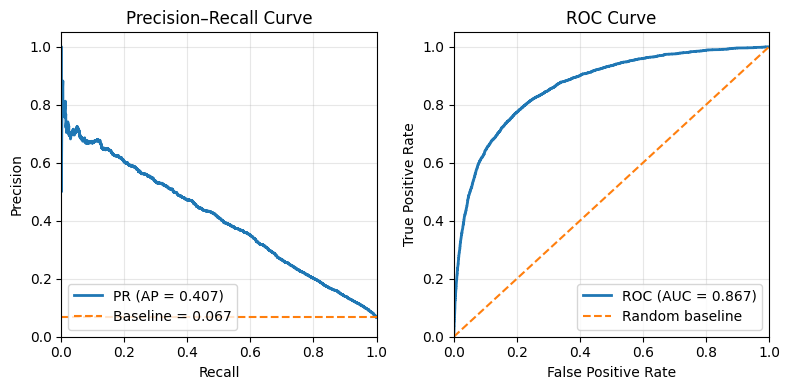


Metrics @0.5 (threshold = 0.5000)
Precision: 0.6167
Recall:    0.1888
F1:        0.2891
Accuracy:  0.9379

Metrics @best-F1 (threshold = 0.2192)
Precision: 0.4242
Recall:    0.4864
F1:        0.4532
Accuracy:  0.9215

Classification report @best-F1:
              precision    recall  f1-score   support

           0     0.9628    0.9527    0.9577     41992
           1     0.4242    0.4864    0.4532      3008

    accuracy                         0.9215     45000
   macro avg     0.6935    0.7195    0.7054     45000
weighted avg     0.9268    0.9215    0.9240     45000

Confusion matrix @best-F1:
[[40006  1986]
 [ 1545  1463]]


In [38]:
y_proba = best_model.predict_proba(X_test)[:,1]
result = evaluate(y_test, y_proba, model_name='CatBoost')

В итоге имеем, что лучше всего работает КатБуст, его берем за рабочую модель

## Интерпретация и этика

Задание просит нас вывести топ-5 признаков с помощью SHAP или LIME. Оба метода являются локальными объяснениями (работают с конкретными датапоинтами, а не со всем датасетом). Тем не менее, мы рассчитаем shap values для всего валидационного сета и усредним. Это даст нам возможность верно выбрать топ 5 признаков больше всего влияющих на предсказание модели

/Users/maxmartyshov/Desktop/IU/test_a/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NumberOfTime30-59DaysPastDueNotWorse    0.602933
NumberOfTimes90DaysLate                 0.282842
RevolvingUtilizationOfUnsecuredLines    0.240974
NumberOfTime60-89DaysPastDueNotWorse    0.186489
NumberRealEstateLoansOrLines            0.139657
dtype: float64


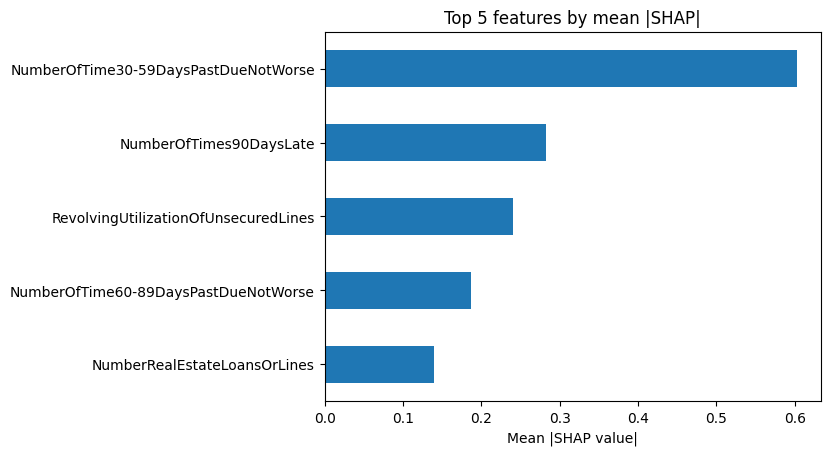

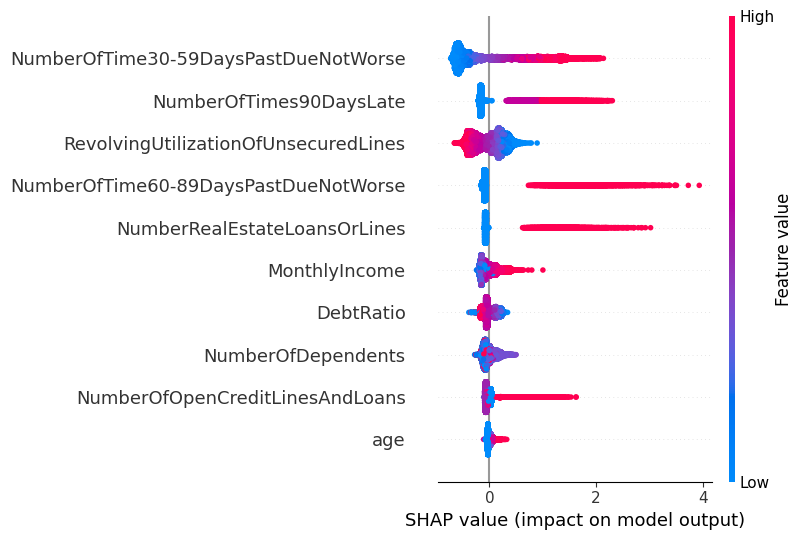

In [39]:
import shap

X_val = X_test
model = best_model

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val) 

mean_abs = np.abs(shap_values).mean(axis=0)
imp = pd.Series(mean_abs, index=X_val.columns).sort_values(ascending=False)

top5 = imp.head(5)
print(top5)

top5.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 5 features by mean |SHAP|')
plt.xlabel('Mean |SHAP value|')
plt.show()

shap.summary_plot(shap_values, X_val, plot_type='dot', show=True, max_display=10)

Ничего необычного - больше всего влияют просрочки и количество кредитов и иппотек. Из этого можем сделать вывод, что модель, прошла sanity check.

Сейчас выберем группы для оценки честности моделей. Логично выбрать группы которые не так сильно влияют на предсказание по ШАПу. Поэтому смотрим возраст, иждевенцев и отношение долга (интересно посмотреть, как модель видит разницу между долгом выше и ниже дохода)

Группы:
- Возсраст
  - `<30`, `30-40`, `40-60`, `60+`
- Количество иждевенцев
  - `0`, `>=1`
- Отношения платежей по кредитам к доходу
  - `[0, 1)`,`[1, +inf)`

In [40]:
def build_eval_df(X, y_true, y_proba, threshold=0.5):
    df = X.copy()
    df["y"]     = np.array(y_true, dtype=int)
    df["proba"] = np.array(y_proba, dtype=float)
    df["pred"]  = (df["proba"] >= threshold).astype(int)
    return df

In [41]:
def add_groups(df: pd.DataFrame) -> pd.DataFrame:
    # Age groups
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 30, 40, 60, np.inf],
        labels=["<30", "30-40", "40-60", "60+"],
        include_lowest=True, right=False
    )
    # Dependents
    df["dependents_group"] = np.where(df["NumberOfDependents"] >= 1, ">=1", "0")
    # DebtRatio bands
    df["debt_income_group"] = np.where(df["DebtRatio"] < 1, "[0,1)", "[1,+inf)")
    return df

In [42]:
def group_metrics(g: pd.DataFrame):
    y  = g["y"].values
    yp = g["pred"].values

    tp = np.sum((y == 1) & (yp == 1))
    fn = np.sum((y == 1) & (yp == 0))
    fp = np.sum((y == 0) & (yp == 1))
    tn = np.sum((y == 0) & (yp == 0))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan   # recall for positives
    fpr = fp / (fp + tn) if (fp + tn) > 0 else np.nan   # false alarm rate
    prec = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    acc  = (tp + tn) / max(len(g), 1)
    prev = np.mean(y)  # prevalence in group
    selr = np.mean(yp) # selection rate (predicted positives)

    return pd.Series({
        "count": len(g),
        "prevalence": prev,
        "selection_rate": selr,
        "TPR": tpr,
        "FPR": fpr,
        "Precision": prec,
        "Accuracy": acc,
        "TP": tp, "FP": fp, "TN": tn, "FN": fn
    })

In [43]:
threshold = result['best_threshold']
eval_df = build_eval_df(X_test_og, y_test, y_proba, threshold=threshold)
eval_df = add_groups(eval_df)
eval_df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,y,proba,pred,age_group,dependents_group,debt_income_group
0,0.000000,50.0,0.0,0.087478,9830.0,6.0,1.0,0.0,1.0,0.0,1,0.281801,1,40-60,0,"[0,1)"
1,0.005770,52.0,0.0,0.063603,10486.0,16.0,0.0,1.0,0.0,0.0,0,0.011316,0,40-60,0,"[0,1)"
2,0.807706,64.0,0.0,0.555962,4100.0,8.0,0.0,2.0,0.0,1.0,0,0.050914,0,60+,>=1,"[0,1)"
3,0.001076,53.0,0.0,0.269278,2450.0,8.0,0.0,0.0,0.0,0.0,0,0.013827,0,40-60,0,"[0,1)"
4,0.022680,58.0,0.0,0.369809,17600.0,17.0,0.0,2.0,0.0,0.0,1,0.012764,0,40-60,0,"[0,1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,1.000000,46.0,1.0,14.000000,5382.0,0.0,2.0,0.0,2.0,0.0,1,0.623452,1,40-60,0,"[1,+inf)"
44996,0.065615,48.0,1.0,1292.000000,5382.0,7.0,0.0,2.0,0.0,0.0,0,0.034018,0,40-60,0,"[1,+inf)"
44997,1.000000,51.0,0.0,0.059608,7800.0,3.0,1.0,0.0,0.0,2.0,0,0.255399,1,40-60,>=1,"[0,1)"
44998,0.020657,67.0,0.0,43.000000,5382.0,7.0,0.0,0.0,0.0,0.0,0,0.006213,0,60+,0,"[1,+inf)"


In [44]:
reports = {}
for col in ["age_group", "dependents_group", "debt_income_group"]:
    rep = eval_df.groupby(col, dropna=False).apply(group_metrics).reset_index()
    # deltas between worst and best (for quick fairness check)
    deltas = {
        "ΔTPR": f'{(rep["TPR"].max() - rep["TPR"].min()):.4f}',
        "ΔFPR": f'{(rep["FPR"].max() - rep["FPR"].min()):.4f}',
        "ΔAccuracy": f'{(rep["Accuracy"].max() - rep["Accuracy"].min()):.4f}',
        "ΔSelectionRate": f'{(rep["selection_rate"].max() - rep["selection_rate"].min()):.4f}',
    }
    reports[col] = (rep, deltas)


/var/folders/fw/0f9ty9l93rj6hg9ppkj65vp00000gn/T/ipykernel_34000/3560400230.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rep = eval_df.groupby(col, dropna=False).apply(group_metrics).reset_index()
/var/folders/fw/0f9ty9l93rj6hg9ppkj65vp00000gn/T/ipykernel_34000/3560400230.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rep = eval_df.groupby(col, dropna=False).apply(group_metrics).reset_index()
/var/folders/fw/0f9ty9l93rj6hg9ppkj65vp00000gn/T/ipykernel_34000/3560400230.py:3: FutureWarning: DataFrameGrou

In [45]:
age_report, age_deltas = reports["age_group"]
print("Age groups:\n", age_report)
print("Deltas:", age_deltas)

Age groups:
   age_group    count  prevalence  selection_rate       TPR       FPR  \
0       <30   2623.0    0.125429        0.161266  0.541033  0.106800   
1     30-40   7003.0    0.101814        0.125375  0.546985  0.077583   
2     40-60  20792.0    0.074307        0.084792  0.480259  0.053047   
3       60+  14582.0    0.028871        0.026402  0.363420  0.016383   

   Precision  Accuracy     TP      FP       TN     FN  
0   0.420804  0.849028  178.0   245.0   2049.0  151.0  
1   0.444191  0.884192  390.0   488.0   5802.0  323.0  
2   0.420874  0.912274  742.0  1021.0  18226.0  803.0  
3   0.397403  0.965711  153.0   232.0  13929.0  268.0  
Deltas: {'ΔTPR': '0.1836', 'ΔFPR': '0.0904', 'ΔAccuracy': '0.1167', 'ΔSelectionRate': '0.1349'}


In [46]:
dep_report, dep_deltas = reports["dependents_group"]
print("\nDependents:\n", dep_report)
print("Deltas:", dep_deltas)


Dependents:
   dependents_group    count  prevalence  selection_rate       TPR       FPR  \
0                0  27323.0    0.057863        0.065000  0.472486  0.039974   
1              >=1  17677.0    0.080726        0.094643  0.501752  0.058892   

   Precision  Accuracy     TP      FP       TN     FN  
0   0.420608  0.931816  747.0  1029.0  24713.0  834.0  
1   0.427974  0.905640  716.0   957.0  15293.0  711.0  
Deltas: {'ΔTPR': '0.0293', 'ΔFPR': '0.0189', 'ΔAccuracy': '0.0262', 'ΔSelectionRate': '0.0296'}


In [47]:
debt_report, debt_deltas = reports["debt_income_group"]
print("\nDebt ratio bands:\n", debt_report)
print("Deltas:", debt_deltas)


Debt ratio bands:
   debt_income_group    count  prevalence  selection_rate       TPR       FPR  \
0             [0,1)  34291.0    0.066606        0.077134  0.478109  0.048521   
1          [1,+inf)  10709.0    0.067607        0.075077  0.512431  0.043365   

   Precision  Accuracy      TP      FP       TN      FN  
0   0.412854  0.919950  1092.0  1553.0  30454.0  1192.0  
1   0.461443  0.926604   371.0   433.0   9552.0   353.0  
Deltas: {'ΔTPR': '0.0343', 'ΔFPR': '0.0052', 'ΔAccuracy': '0.0067', 'ΔSelectionRate': '0.0021'}


# Отчет

## Описание данных и предварительная обработка

Данные представляют собой кредитную выборку для задачи бинарной классификации — прогнозирования вероятности дефолта клиента в течение двух лет (`SeriousDlqin2yrs`).
Целевая переменная сильно дисбалансна: положительный класс (дефолт) составляет лишь около **6–7%** от общего числа наблюдений.

Для борьбы с дисбалансом были протестированы два подхода:
- SMOTE (Synthetic Minority Oversampling Technique) – искусственное дополнение выборки положительными примерами;
- class_weight='balanced' – балансировка весов классов при обучении.

По результатам валидации на всех трёх моделях (*Logistic Regression*, *XGBoost*, *CatBoost*) метод с балансировкой весов показал себя лучше и был использован в финальных экспериментах.

Большинство числовых признаков имеют существенные правосторонние выбросы в сторону бесконечности, что приводит к смещению среднего значения врпаво. Для смягчения влияния хвостов распределений применялось логарифмирование (*log-transform*).
Были протестированы варианты моделей с логарифмированием и без него - использование лог-трансформации дало заметное улучшение качества.

Из-за наличия выбросов (и, как следствие, смещения среднего) стратегия заполнения пропусков была выбрана как медианная импутация, поскольку медиана устойчивее к экстремальным значениям.

Для нормализации признаков использовался стандартный скейлинг (*StandardScaler*).

Уже на этапе разведочного анализа данных (EDA) была выявлена корреляция между положительным классом целевой переменной и трёмя признаками просрочки платежей (`NumberOfTime30-59DaysPastDueNotWorse`,` NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`).
Позднее анализ важности признаков с помощью SHAP полностью подтвердил их ключевое влияние на риск дефолта.

Визуализация некоторых признаков (подробнее в <ссылка на этот ноутбук добавить в ридми>)

распределение количества просрочек разной длительности (30–59, 60–89 и 90+ дней) для клиентов с дефолтом и без него
<p align="center">
  <img src="assets/pastdue_target_corr.png" width="800"/>
</p>

Распределение целевой переменной (`SeriousDlqin2yrs`) 
<p align="center">
  <img src="assets/target_dist.png" width="400"/>
</p>

Долговая нагрузка клиентов (`RevolvingUtilizationOfUnsecuredLines`) 
<p align="center">
  <img src="assets/credit_load.png" width="400"/>
</p>




## Тренировка модели

Были протестированы три классификатора: *Logistic Regression*, *XGBoost* и *CatBoost*.
По итогам сравнительной оценки **CatBoost** показал наилучшие результаты по всем ключевым метрикам и был выбран в качестве финальной модели.

Для оценки качества использовались следующие метрики:
- Precision, Recall, F1-score, Accuracy - стандартные метрики классификации;
- PR-AUC - основная метрика при сильном дисбалансе классов;
- ROC-AUC - дополнительная метрика для проверки общей способности модели различать классы.

Целевая переменная крайне несбалансирована - дефолт встречается только у ~6% клиентов.
При таком дисбалансе *Accuracy* теряет смысл, так как даже константное предсказание “все 0” (все без дефолта) дало бы около 93% точности.
Поэтому *Accuracy* использовалась лишь как справочный показатель - чтобы оценить, насколько модель превосходит этот базовый уровень (baseline).

Основной метрикой выбрана **PR-AUC ~ 0.40**.
Она более адекватно отражает качество классификатора в условиях дисбаланса,
так как показывает, как меняются *Precision* и *Recall* при разных порогах классификации.

Для PR-AUC базовым уровнем выступает *prevalence* - доля положительного класса в данных (~0.06),
то есть вероятность «поймать дефолт» случайным образом.
Полученное значение PR-AUC в 6-7 раз выше базового уровня, что говорит о способности модели эффективно различать дефолтных и надёжных клиентов, даже при сильном смещении классов.

Для сравнения рассчитан ROC-AUC ~ 0.86, что также подтверждает высокое качество модели
(базовым уровнем для ROC-AUC служит случайный классификатор - 0.5).

При стандартном пороге 0.5 модель показывала высокую точность, но низкий Recall (~0.19),
что означает - она находила лишь часть дефолтных клиентов.
Для балансировки Precision и Recall был выбран порог, максимизирующий F1-score (0.2).

При этом F1-score вырос с 0.29 → 0.45, Recall - с 0.19 → 0.49,
а точность снизилась незначительно (0.94 → 0.92), что считается хорошим компромиссом.

### Результаты и визуализация

| Метрика   | @0.5 | @Best F1 (~0.2) |
|------------|------|-----------------|
| Precision  | 0.62 | 0.42            |
| Recall     | 0.19 | 0.49            |
| F1         | 0.29 | 0.45            |
| Accuracy   | 0.94 | 0.92            |

PR-AUC = 0.40 | ROC-AUC = 0.86 | Baseline (prevalence) = 0.06



Ниже приведены графики Precision–Recall и ROC–AUC кривых,
а также таблицы с метриками и матрицей ошибок (confusion matrix) для оптимального порога.

<p align="center">
  <img src="assets/CBoost_eval_curves.png" alt="PR and ROC curves" width="700"/>
</p>

## Интерпретация
Для интерпретации работы модели был проведён SHAP-анализ (SHapley Additive exPlanations).
Так как *SHAP* и *LIME* дают локальные объяснения, то есть показывают вклад признаков в предсказание для конкретного примера, для получения глобальной картины важности признаков были вычислены значения SHAP для всех наблюдений evaluation-сета, после чего рассчитано среднее абсолютное значение SHAP по каждому признаку.

### Глобальная важность признаков
По результатам анализа наибольший вклад в прогноз дефолта вносили следующие признаки:
- `NumberOfTime30–59DaysPastDueNotWorse`
  - Количество просрочек 30–59 дней за 2 года. Клиенты с частыми краткими просрочками чаще попадают в дефолт
    - увеличивает риск
- `NumberOfTimes90DaysLate`
  - Просрочки 90+ дней - сильнейший индикатор ненадёжности заёмщика
    - увеличивает риск
- `RevolvingUtilizationOfUnsecuredLines`
  - Отношение задолженности к доступному кредитному лимиту. Чем выше использование лимита, тем выше нагрузка и риск
    - увеличивает риск
- `NumberOfTime60-89DaysPastDueNotWorse`
  - Средние просрочки также связаны с дефолтом, но влияние слабее, чем у крайних случаев
    - увеличивает риск
- `NumberRealEstateLoansOrLines`
  - Количество кредитов, обеспеченных недвижимостью. Модератное значение показателя снижает риск, а слишком высокое - может указывать на перегрузку
    - нелинейное влияние
  
<p align="center">
  <img src="assets/shap_top5.png" alt="Top 5 features by mean SHAP" width="600"/>
</p>

Выводы из наблюдений:
- Все три признака, связанные с просрочками, ожидаемо оказались наиболее значимыми и подтверждают результаты **EDA**: чем чаще клиент допускает просрочки, тем выше вероятность дефолта.
- Признак `RevolvingUtilizationOfUnsecuredLines` (кредитная нагрузка) также оказывает сильное влияние: высокая загрузка кредитных лимитов ведёт к росту риска.
- Наличие нескольких реальных активов (ипотек) умеренно снижает риск, но слишком большое количество может указывать на финансовую перегрузку.

<p align="center">
  <img src="assets/shap_general.png" alt="SHAP summary plot" width="600"/>
</p>

**Summary plot**, где цвет отражает значение признака (от низких - синие точки, до высоких - красные),
а положение вдоль оси X - направление и силу влияния на вероятность дефолта.

Можно видеть, что высокие значения признаков, связанных с просрочками и кредитной нагрузкой,
систематически смещают предсказание модели в сторону дефолта,
что соответствует бизнес-логике и подтверждает корректность работы классификатора.

## Этика
Для проверки объективности работы модели была проведена оценка **fairness** - насколько одинаково модель ведёт себя для разных подгрупп пользователей.
Мы сознательно выбрали признаки, менее влияющие на итоговую классификацию (по результатам *SHAP*), но потенциально связанные с социально чувствительными характеристиками.

Были выделены три группы:
- Возраст: `<30`, `30-40`, `40-60`, `60+`
- Количество иждивенцев: `0`, `>=1`
- Отношение платежей по кредитам к доходу (DebtRatio): `[0,1)`, `[1,+inf)`

Для каждой группы рассчитаны ключевые метрики:
TPR (True Positive Rate), FPR (False Positive Rate), Precision, Accuracy, а также доля выборки, попавшая в класс дефолта (Selection Rate).
Затем сравнили минимальные и максимальные значения метрик внутри каждой группы

**Взраст**
| age_group | count  | prevalence | selection_rate |   TPR   |   FPR   | Precision | Accuracy |   TP  |  FP  |   TN  |  FN  |
|------------|--------|-------------|----------------|---------|---------|------------|-----------|-------|------|-------|------|
| <30        | 2623   | 0.125429    | 0.161266       | 0.5410  | 0.1068  | 0.4208     | 0.8490    | 178   | 245  | 2049  | 151  |
| 30-40      | 7003   | 0.101814    | 0.125375       | 0.5470  | 0.0776  | 0.4442     | 0.8842    | 390   | 488  | 5802  | 323  |
| 40-60      | 20792  | 0.074307    | 0.084792       | 0.4803  | 0.0530  | 0.4209     | 0.9123    | 742   | 1021 | 18226 | 803  |
| 60+        | 14582  | 0.028871    | 0.026402       | 0.3634  | 0.0164  | 0.3974     | 0.9657    | 153   | 232  | 13929 | 268  |

ΔTPR = 0.1836 ΔFPR = 0.0904 ΔAccuracy = 0.1167 ΔSelectionRate = 0.1349

- Модель чаще находит дефолт среди молодых клиентов (<40) и реже среди пожилых (60+)
- TPR и FPR постепенно снижаются с возрастом, что может указывать на умеренный возрастной bias
- Однако разрывы по метрикам умеренные — существенной дискриминации не наблюдается

**Количество иждевенцев**
| debt_income_group | count  | prevalence | selection_rate |   TPR   |   FPR   | Precision | Accuracy |   TP  |  FP  |   TN  |  FN  |
|-------------------|--------|-------------|----------------|---------|---------|------------|-----------|-------|------|-------|------|
| [0,1)             | 34291  | 0.066606    | 0.077134       | 0.4781  | 0.0485  | 0.4129     | 0.9200    | 1092  | 1553 | 30454 | 1192 |
| [1,+inf)          | 10709  | 0.067607    | 0.075077       | 0.5124  | 0.0434  | 0.4614     | 0.9266    | 371   | 433  | 9552  | 353  |

ΔTPR = 0.0343 ΔFPR = 0.0052 ΔAccuracy = 0.0067 ΔSelectionRate = 0.0021

- Различия между клиентами с иждивенцами и без минимальны
- TPR и FPR отличаются незначительно (<3 п.п.), что говорит о справедливом поведении модели в этом разрезе

**Debt Ratio**
| debt_income_group | count  | prevalence | selection_rate |   TPR   |   FPR   | Precision | Accuracy |   TP  |  FP  |   TN  |  FN  |
|-------------------|--------|-------------|----------------|---------|---------|------------|-----------|-------|------|-------|------|
| [0,1)             | 34291  | 0.066606    | 0.077134       | 0.4781  | 0.0485  | 0.4129     | 0.9200    | 1092  | 1553 | 30454 | 1192 |
| [1,+inf)          | 10709  | 0.067607    | 0.075077       | 0.5124  | 0.0434  | 0.4614     | 0.9266    | 371   | 433  | 9552  | 353  |

ΔTPR = 0.0343 ΔFPR = 0.0052 ΔAccuracy = 0.0067 ΔSelectionRate = 0.0021

- Модель ведёт себя стабильно для клиентов с разной долговой нагрузкой
- Различия между группами минимальны (<3-4 п.п.), что говорит об отсутствии статистически значимого bias по DebtRatio

Вывод об объективности модели:
- Модель демонстрирует умеренное снижение чувствительности (TPR) с увеличением возраста, что может указывать на осторожность при классификации пожилых клиентов
- По остальным признакам (наличие иждивенцев, долговая нагрузка) существенных различий не наблюдается - модель ведёт себя справедливо
- В целом, отклонения по FPR/TPR между группами находятся в пределах ±0.03-0.18, что укладывается в допустимые рамки для бизнес-моделей без прямой социальной дискриминации

## Общие выводы о валидации и рекомендации модели

### Качество
Построенная модель кредитного скоринга на основе CatBoost продемонстрировала высокую способность различать дефолтных и надёжных клиентов при критическом дисбалансе классов

Ключевые метрики показали стабильные результаты:
- **PR-AUC ~ 0.40** (**в 6-7 раз выше случайного базиса** ~0.06)
-	**ROC-AUC ~ 0.8**6, что также указывает на хорошее ранжирование клиентов по риску
- При оптимальном пороге (~0.2) достигается баланс Precision/Recall, **F1 ~ 0.45** при общей точности около 0.92

Таким образом, модель достаточно надёжна для приоритезации клиентов по уровню риска, днако не является идеальной системой автоматического одобрения кредитов - часть дефолтов всё ещё остаётся нераспознанной (Recall < 0.5)

### Ограниченния
1. Дисбаланс классов остаётся серьёзным фактором: при низкой доле дефолтов даже небольшое смещение порога влияет на Precision и Recall
2. Качество данных ограничивает точность: отсутствуют признаки, описывающие поведение клиентов во времени (например, динамика платежей, длительность кредитной истории)
3. Некоторые признаки коррелируют между собой, что может влиять на интерпретацию SHAP и на стабильность модели
4. Модель обучалась на исторических данных, не учитывающих экономические изменения (например, макрофинансовые шоки, инфляцию), поэтому для применения в будущем потребуется периодическая переобучаемость

### Рекомендации
- Собрать дополнительные данные:
  - поведенческие признаки (частота платежей, изменение лимита, новые кредиты)
	- макроэкономические индикаторы (ставки, инфляция, региональные риски)
	- категориальные признаки клиента (тип занятости, семейное положение, стаж)
- Улучшить баланс классов
- Периодически переобучать модель, чтобы учитывать изменения в поведении клиентов и экономике
- Проверить прокси-признаки, чтобы убедиться, что модель не косвенно использует чувствительные атрибуты (например, возраст через доход, если добавить доход)

**Пример интерпретации прогноза**
> Как изменится прогноз, если у заёмщика появится иждивенец?
- По SHAP-анализу признак `NumberOfDependents` имеет умеренное отрицательное влияние на вероятность дефолта - то есть само наличие иждивенцев незначительно увеличивает риск, но эффект мал по сравнению с факторами, отражающими финансовое поведение (просрочки и долговая нагрузка). Например, если у клиента без просрочек появляется один иждивенец, его прогнозируемая вероятность дефолта изменится меньше чем на 1-2 процентных пункта, в то время как появление даже одной просрочки 30-59 дней увеличивает риск в несколько раз.

